In [1]:
from tests import *
from sklearn.model_selection import GridSearchCV

# C) Modèles de Machine Learning

## 1) Métriques d'évaluation

Nous évaluons nos modèles grâce à des mesures adaptées au déséquilibre:
- Courbe ROC,
- AUC
- F1-score

## Etape 1 : selection de la variante BOW et de la suppression ou non des stopwords

In [2]:
# Comparer les variantes BOW avec des données pretraitées avec supression des stopwords de la bibliotheque nltk
df_president_lg_swF = pd.read_csv('./dataframes/df_president_lg_swF.csv') 
tester(df_president_lg_swF)

******************** BOW ********************
---- Naive Bayes ----
                 precision    recall  f1-score   support

Classe négative       0.66      0.30      0.42      1503
Classe positive       0.90      0.98      0.94      9980

       accuracy                           0.89     11483
      macro avg       0.78      0.64      0.68     11483
   weighted avg       0.87      0.89      0.87     11483


---- Logistic regression ---- 
                 precision    recall  f1-score   support

Classe négative       0.68      0.45      0.54      1503
Classe positive       0.92      0.97      0.94      9980

       accuracy                           0.90     11483
      macro avg       0.80      0.71      0.74     11483
   weighted avg       0.89      0.90      0.89     11483


---- SVC ---- 
                 precision    recall  f1-score   support

Classe négative       0.67      0.47      0.55      1503
Classe positive       0.92      0.97      0.94      9980

       accuracy      

In [3]:
# Comparer les variantes BOW avec des données pretraitées avec supression des stopwords du fichier des 700 mots
df_president_lg_sw = pd.read_csv('./dataframes/df_president_lg_sw.csv')  
tester(df_president_lg_sw)

******************** BOW ********************
---- Naive Bayes ----
                 precision    recall  f1-score   support

Classe négative       0.68      0.29      0.41      1503
Classe positive       0.90      0.98      0.94      9980

       accuracy                           0.89     11483
      macro avg       0.79      0.64      0.67     11483
   weighted avg       0.87      0.89      0.87     11483


---- Logistic regression ---- 
                 precision    recall  f1-score   support

Classe négative       0.61      0.36      0.46      1503
Classe positive       0.91      0.97      0.94      9980

       accuracy                           0.89     11483
      macro avg       0.76      0.66      0.70     11483
   weighted avg       0.87      0.89      0.87     11483


---- SVC ---- 
                 precision    recall  f1-score   support

Classe négative       0.66      0.38      0.48      1503
Classe positive       0.91      0.97      0.94      9980

       accuracy      

## Etape 2 : Traitement de classes déséquilibrées

On sélectionne pour la suite le dataframe des documents prétraités avec la petite liste de stopwords. <br>
Pour le vectorizer, le BoW simple a retourné les meilleurs résultats.

In [4]:
df_president_lg_swF = pd.read_csv('./dataframes/df_president_lg_swF.csv')  #!! dataframes_preprocessed

### Sans echantillonnage et sans class weight


#### Optimisation des paramètres du vectorizer

In [5]:
#optimisation des paramètres du vectorizer
args = ["president", "f1"]
resultats=tester(df_president_lg_swF, 2 ,*args)
resultats


max_df 0.6 min_df= 2 ngram_range= (1, 2)
________________________________________________________


---- Naive Bayes ----
F1 score classe négative =  0.5611814345991563
F1 score classe positive =  0.9379783321737402

---- Logistic regression ---- 
F1 score classe négative =  0.5281102647805586
F1 score classe positive =  0.9356227423425206

---- SVC ---- 
F1 score classe négative =  0.5426074289876183
F1 score classe positive =  0.9378832838773492

max_df 0.6 min_df= 2 ngram_range= (1, 3)
________________________________________________________
---- Naive Bayes ----
F1 score classe négative =  0.5330056179775281
F1 score classe positive =  0.9338900487125956

---- Logistic regression ---- 
F1 score classe négative =  0.5376737381126554
F1 score classe positive =  0.9375247133254251

---- SVC ---- 
F1 score classe négative =  0.5466568699485672
F1 score classe positive =  0.9390436672594349

max_df 0.6 min_df= 2 ngram_range= (1, 4)
________________________________________________________
---- Naive Bayes ----
F1 score classe négative =  0.5135135135135136
F1 score classe positive =  0

In [ ]:
list_idxmax=resultats.iloc[:,-3:].idxmax(axis=0).tolist()
best_resultats=resultats.loc[list_idxmax].reset_index()
best_resultats=best_resultats.drop(columns="index")
best_resultats

,max_df,min_df,ngram_range,Naive Bayes,Logistic Regression,SVC
0,0.6,5,"(1, 2)",0.573755,0.502667,0.527565
1,0.6,2,"(1, 4)",0.513514,0.537870,0.544123
2,0.6,2,"(1, 3)",0.533006,0.537674,0.546657


Le modèle le plus performant est <b> Naive Bayes </b> avec des paramètres: <br>
- max_df=0.6
- min_df=5
- n_gram_range=(1,2)

### Optimisation des paramètres du modèle d'apprentissage

#### Sans Class weight

In [ ]:
#appliquer un grid scearch sur naive bayes
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_president_lg_swF.text)

# Définir les hyperparamètres à tester
param_grid = {
    'alpha': [0.1, 0.5, 0.6, 0.7, 1.0],  # Lissage de Laplace (gérer les mots qui n'ont pas été observés dans l'ensemble d'entraînement)
    'fit_prior': [True, False],  # Apprendre les probabilités a priori ou supposer uniforme
}

#instancier le modèle Naive Bayes
nb_clf = MultinomialNB()

scorer = make_scorer(f1_score_class_0) #f1_score_class_0 est la fonction qui retourne le f1_score de la classe mitterand

grid_search = GridSearchCV(nb_clf, param_grid, scoring=scorer)

Y = df_president_lg_swF.iloc[:,-1]
grid_search.fit(X, Y)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

print("\nMeilleure performance (f1 score classe mitterand) :")
print(grid_search.best_score_)

Meilleurs hyperparamètres trouvés :
{'alpha': 0.5, 'fit_prior': True}

Meilleure performance (f1 score classe mitterand) :
0.5511479957784309


#### Avec class weight

In [ ]:
#appliquer un grid scearch sur naive bayes
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_president_lg_swF.text)

# Définir les hyperparamètres à tester
param_grid = {
    'alpha': [0.1, 0.5, 0.6, 0.7, 1.0],  # Lissage de Laplace (gérer les mots qui n'ont pas été observés dans l'ensemble d'entraînement)
    'fit_prior': [True, False],  # Apprendre les probabilités a priori ou supposer uniforme
    'class_prior': [None,[0.1, 0.9], [0.15, 0.85], [0.2, 0.8],[0.6,0.4]]  # Poids de classe
}

#instancier le modèle Naive Bayes
nb_clf = MultinomialNB()

scorer = make_scorer(f1_score_class_0) #f1_score_class_0 est la fonction qui retourne le f1_score de la classe mitterand

grid_search = GridSearchCV(nb_clf, param_grid, scoring=scorer)

Y = df_president_lg_swF.iloc[:,-1]
grid_search.fit(X, Y)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

print("\nMeilleure performance (f1 score classe mitterand) :")
print(grid_search.best_score_)

Meilleurs hyperparamètres trouvés :
{'alpha': 0.5, 'class_prior': [0.1, 0.9], 'fit_prior': True}

Meilleure performance (f1 score classe mitterand) :
0.5525556862472365


##### Tester sur le serveur d'evalution

In [ ]:
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_president_lg_swF.text)
Y = df_president_lg_swF.iloc[:,-1]

with open('./dataframes/df_president_test_lg_swF.csv', 'r') as f:
    lignes=f.readlines()

df_test=pd.DataFrame(lignes[1:])
df_test.iloc[:,0]=df_test.iloc[:,0].apply(lambda x: x[:-2])
X_test=vectorizer.transform(df_test.iloc[:,0])

nb_clf = MultinomialNB(alpha=0.5, class_prior=[0.1, 0.9])

nb_clf.fit(X, Y)
pred_nb = nb_clf.predict_proba(X_test)
pred_nb=pred_nb[:,0]
pred_nb

array([3.83693170e-12, 1.56311645e-01, 7.74693590e-02, ...,
       8.32567808e-03, 3.16268874e-03, 3.23680365e-07])

In [ ]:
chemin_fichier_csv = './serveurEval/president_nb_classWeight.txt'

np.savetxt(chemin_fichier_csv, pred_nb, fmt="%.5f")

#### Sur echantillonage

On surechantillonne le dataset de test complet pour entrainer le model dessus et tester directement sur le dataset de test ssur e serveur deval

total class of 1 and -1: president
 1    49890
-1    49890
Name: count, dtype: int64


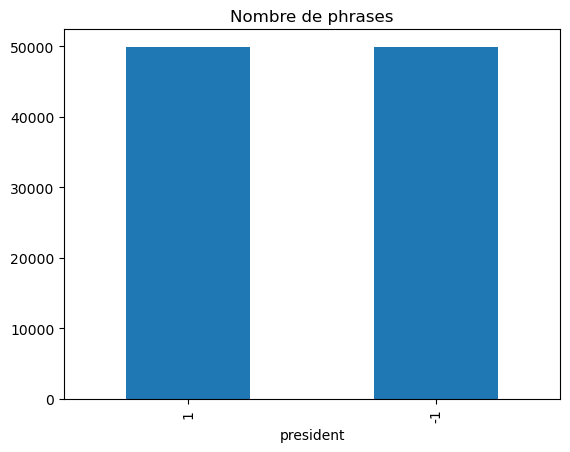

In [ ]:
# class count
class_count_1, class_count_0  = df_president_lg_swF.iloc[:, -1].value_counts()

# Séparer les classes
df_classe_1 = df_president_lg_swF[df_president_lg_swF.iloc[:, -1] == 1]
df_classe_0 = df_president_lg_swF[df_president_lg_swF.iloc[:, -1] == -1]


df_classe_0_over = df_classe_0.sample(class_count_1, replace=True) # over sample la classe mitterand

df_over = pd.concat([df_classe_1, df_classe_0_over], axis=0)
df_over.sample(frac=1)

print("total class of 1 and -1:",df_over.iloc[:, -1].value_counts())# plot the count after under-sampeling
df_over.iloc[:, -1].value_counts().plot(kind='bar', title='Nombre de phrases')

plt.show()



##### Tester sur le serveur d'evalution

In [ ]:
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_over.text)
Y = df_over.iloc[:,-1]

with open('./dataframes/df_president_test_lg_swF.csv', 'r') as f:
    lignes=f.readlines()

df_test=pd.DataFrame(lignes[1:])
df_test.iloc[:,0]=df_test.iloc[:,0].apply(lambda x: x[:-2])
X_test=vectorizer.transform(df_test.iloc[:,0])

nb_clf = MultinomialNB(alpha=0.5, class_prior=[0.1, 0.9])

nb_clf.fit(X, Y)
pred_nb = nb_clf.predict_proba(X_test)
pred_nb=pred_nb[:,0]
pred_nb

array([1.23906594e-20, 1.92103101e-03, 6.28649229e-02, ...,
       5.61069954e-05, 3.69259349e-04, 3.14071235e-14])

In [ ]:
chemin_fichier_csv = './serveurEval/president_nb_over.txt'

np.savetxt(chemin_fichier_csv, pred_nb, fmt="%.5f")

total class of 1 and -1: president
-1    7523
 1    7523
Name: count, dtype: int64


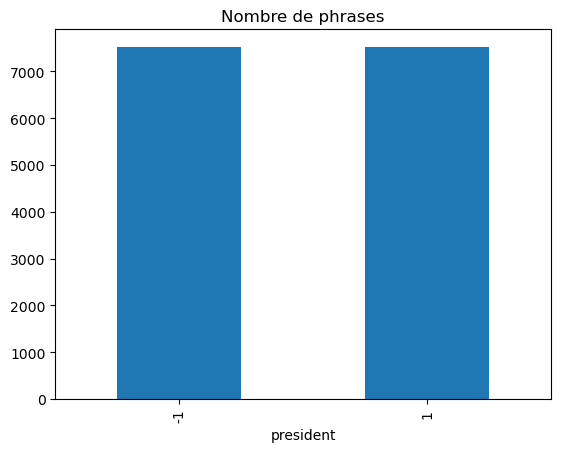

In [ ]:
# class count
class_count_1, class_count_0  = df_president_lg_swF.iloc[:, -1].value_counts()

# Séparer les classes
df_classe_1 = df_president_lg_swF[df_president_lg_swF.iloc[:, -1] == 1]
df_classe_0 = df_president_lg_swF[df_president_lg_swF.iloc[:, -1] == -1]


df_classe_1_under = df_classe_1.sample(class_count_0, replace=True) # under sample la classe mitterand

df_under = pd.concat([df_classe_0, df_classe_1_under], axis=0)
df_under.sample(frac=1)

print("total class of 1 and -1:",df_under.iloc[:, -1].value_counts())# plot the count after under-sampeling
df_under.iloc[:, -1].value_counts().plot(kind='bar', title='Nombre de phrases')

plt.show()



##### Tester serveur d'evaluation

In [ ]:
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_under.text)
Y = df_under.iloc[:,-1]

with open('./dataframes/df_president_test_lg_swF.csv', 'r') as f:
    lignes=f.readlines()

df_test=pd.DataFrame(lignes[1:])
df_test.iloc[:,0]=df_test.iloc[:,0].apply(lambda x: x[:-2])
X_test=vectorizer.transform(df_test.iloc[:,0])

nb_clf = MultinomialNB(alpha=0.5, class_prior=[0.1, 0.9])

nb_clf.fit(X, Y)
pred_nb = nb_clf.predict_proba(X_test)
pred_nb=pred_nb[:,0]
pred_nb

array([1.22137346e-08, 5.62037150e-02, 8.61283500e-02, ...,
       6.22544082e-03, 1.41283582e-02, 8.95423698e-02])

In [ ]:
chemin_fichier_csv = './serveurEval/president_nb_under.txt'

np.savetxt(chemin_fichier_csv, pred_nb, fmt="%.5f")

#### Lissage Gaussien

In [ ]:
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_president_lg_swF.text)
Y = df_president_lg_swF.iloc[:,-1]

rs=10
[X_train, X_test, y_train, y_test]  = train_test_split(X, Y, test_size=0.2, random_state=rs, shuffle=False) #Important de ne pas shuffle les données !

nb_clf = MultinomialNB(alpha=0.5, class_prior=[0.1, 0.9])

nb_clf.fit(X_train, y_train)
pred_nb = nb_clf.predict_proba(X_test)


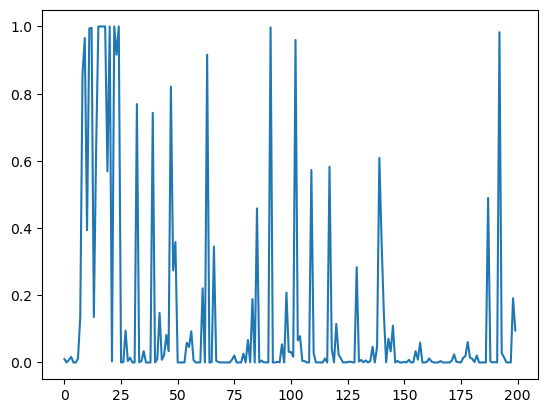

Probabilités initiales : [3.76153437e-03 2.45812382e-04 8.59522840e-05 ... 7.24808060e-02
 5.58734277e-02 1.22963190e-01]
Probabilités lissées : [0.00285255 0.00351179 0.00483245 ... 0.06291653 0.06929664 0.07362728]


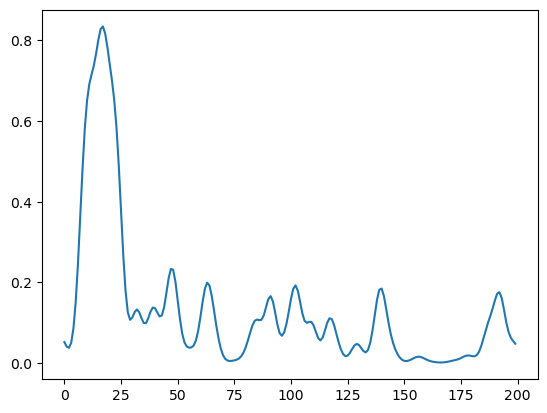

In [ ]:
labs = pred_nb[:,0]

plt.figure()
plt.plot(list(range(len(labs[300:500]))),labs[300:500])
plt.show()
# Taille du lissage gaussien
size = 2.5
pred = pred_nb[:,0]
# Appliquer le lissage gaussien
smoothed_pred = gaussian_smoothing(pred, size)

print("Probabilités initiales :", pred)
print("Probabilités lissées :", smoothed_pred)

labs = smoothed_pred

plt.figure()
plt.plot(list(range(len(labs[300:500]))),labs[300:500])
plt.show()


In [ ]:
res_smoothing = np.where(smoothed_pred >= 0.5, -1, 1)
print(classification_report(y_test, res_smoothing, target_names=['Mitterand', 'Chirac']))

              precision    recall  f1-score   support

   Mitterand       0.81      0.63      0.71      1163
      Chirac       0.96      0.98      0.97     10320

    accuracy                           0.95     11483
   macro avg       0.88      0.80      0.84     11483
weighted avg       0.94      0.95      0.94     11483



##### Tester serveur d'evaluation

In [ ]:
vectorizer = CountVectorizer(max_df=0.6, min_df=5, ngram_range=(1,2),binary=False)
X = vectorizer.fit_transform(df_under.text)
Y = df_under.iloc[:,-1]

with open('./dataframes/df_president_test_lg_swF.csv', 'r') as f:
    lignes=f.readlines()

df_test=pd.DataFrame(lignes[1:])
df_test.iloc[:,0]=df_test.iloc[:,0].apply(lambda x: x[:-2])
X_test=vectorizer.transform(df_test.iloc[:,0])

nb_clf = MultinomialNB(alpha=0.5, class_prior=[0.1, 0.9])

nb_clf.fit(X, Y)
pred_nb = nb_clf.predict_proba(X_test)
pred_nb=pred_nb[:,0]

# Taille du lissage gaussien
size = 2.5
# Appliquer le lissage gaussien
smoothed_pred = gaussian_smoothing(pred_nb, size)
chemin_fichier_csv = './serveurEval/president_nb_classWeight_lissageG2.txt'

np.savetxt(chemin_fichier_csv, smoothed_pred, fmt="%.5f")

#### Courbe ROC et rappel/precision

In [ ]:
y_test=np.where(y_test==-1, 1, -1) # Inverser les labels pour afficher courbe roc et rappel-precision en admettant que Mitterand est la classe Positive (pour que TP ne soit pas faussé)

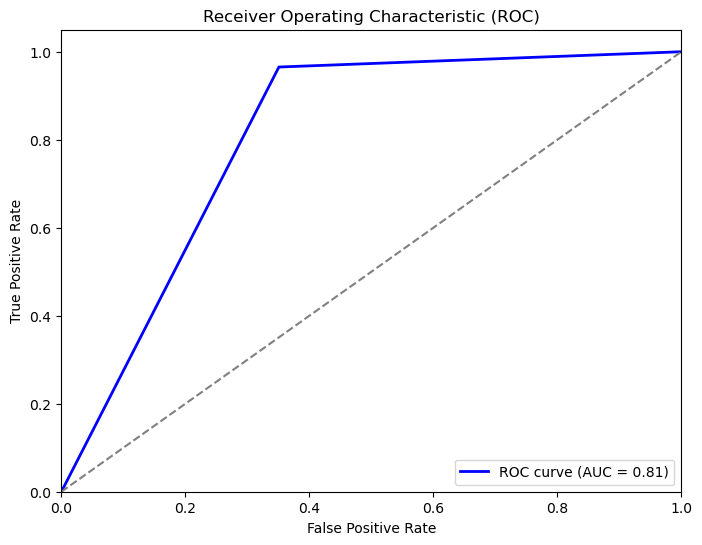

In [ ]:
tracer_courbe_roc(y_test, smoothed_pred)

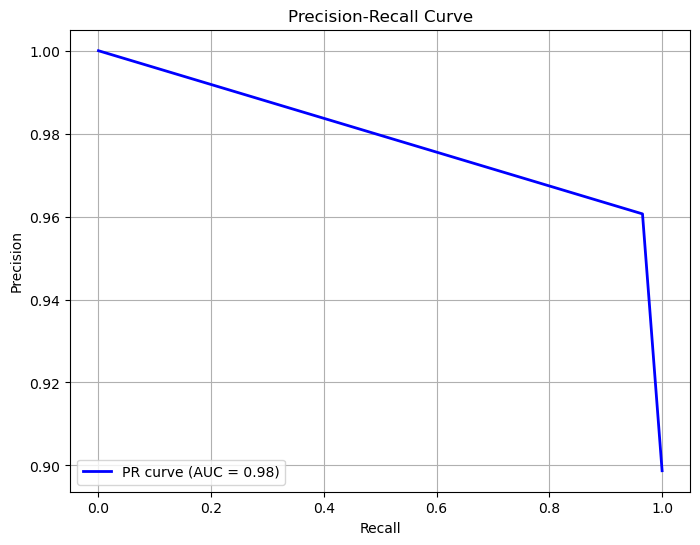

In [ ]:
tracer_courbe_rappel_precision(y_test, smoothed_pred)